# Pima Indians Diabetes dataset
![](https://ankhoudary12.github.io/assets/diabetes_images/pima.jpeg)

The features (attributes) of the dataset:
*   Pregnancies (preg) : number of times pregnant
* Glucose (Plas): concentration of glucose in blood 2 hrs after ingestion of sugary drink (mmol/L)
*   Blood Pressure (pres): diastolic blood pressure (mm Hg)
*   Skin Thickness (skin): triceps skin fold thickness (mm)
*   Insulin (insu): concentration of insulin in blood 2 hrs after ingestion of sugary drink (μU/mL)
*   BMI (mass): body mass index (weight in kg/(height in m)^2)
*   Diabetes Pedigree Function (Predi): 0:1 value generated from familial diabetes history/risk
*   Age: age of patient

The output of the dataset:
* Label: 0 (no diabetes)  and 1 (Type II diabetes)


## อ่านไฟล์ pima_diab.csv จากนั้นแสดง 20 rows แรกของชุดข้อมูล
** ให้นักศึกษาโหลดไฟล์ชุดข้อมูล pima diabete จาก google classroom

In [9]:
import pandas as pd                  ## import pandas library
dataset = 'pima_diab.csv'
df = pd.read_csv(dataset)               ## read dataset from url
df.head(20)

,Unnamed: 0,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,tested_positive
1,1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,tested_negative
2,2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,tested_positive
3,3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,tested_negative
4,4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,tested_positive
5,5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,tested_negative
6,6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,tested_positive
7,7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,tested_negative
8,8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,tested_positive
9,9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,tested_positive


### แสดงจำนวน samples ของผู้ป่วยที่เป็นเบาหวาน (tested_positive) และไม่เป็นเบาหวาน (tested_negative) 

In [10]:
pos_samples = (df['class'] == 'tested_positive').sum()
neg_samples = (df['class'] == 'tested_negative').sum()
print(pos_samples)
print(neg_samples)

264
496


### สร้างฟังก์ชั่น (function) เพื่อ clean ชุดข้อมูลนี้ ดังต่อไปนี้
3.1	ลบคอลัมน์ ‘unnamed:0’ 

3.2	เติม missing value ด้วยค่าเฉลี่ย (mean) ในแต่ละคอลัมน์ประเภท numeric และเติมด้วย most frequent value สำหรับคอลัมน์ประเภท categorical 

3.3	แทนค่าในคอลัมน์ class โดยแทน ‘tested_negative’ ด้วย 0 และ ‘tested_positive ด้วย 1    

โดยส่งค่ากลับเป็น dataframe ที่ถูก clean แล้ว 

In [11]:
import pandas as pd

def clean_data(df):
    # 3.1 ลบคอลัมน์ unnamed:0 
    df = df.drop(columns=['Unnamed: 0'])

    # 3.2 เติม missing value
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':  # numeric
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
        else:  # categorical
            most_frequent = df[col].mode()[0]
            df[col].fillna(most_frequent, inplace=True)

    # 3.3 แทนค่าในคอลัมน์ class
    df['class'] = df['class'].replace({'tested_negative': 0,'tested_positive': 1})

    return df
df = clean_data(df)
df


C:\Users\ZenBook\AppData\Local\Temp\ipykernel_16600\1009727351.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
C:\Users\ZenBook\AppData\Local\Temp\ipykernel_16600\1009727351.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


## Feature Selection
สร้างฟังก์ชั่นเพื่อเลือก features ที่มีค่า correlation กับ class สูงสุด 4 อันดับแรก พร้อมนำมาสร้าง dataframe ใหม่ ตั้งชื่อ newdf  โดย feature ที่ถูกเลือกคือ 

In [31]:
def feature_selection(df, num_feas = 4):
    cor = df.corr()
    cor_target = cor["class"]
    cor_target.sort_values(ascending = False)
    relevant_features = cor_target[:num_feas].index
    newdf = df[relevant_features]
    newdf['class'] = df['class']
    return newdf

newdf = feature_selection(df, 4)
newdf

C:\Users\ZenBook\AppData\Local\Temp\ipykernel_16600\1908632534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['class'] = df['class']


,preg,plas,pres,skin,class
0,6.000000,148.0,72.0,35.00000,1
1,1.000000,85.0,66.0,29.00000,0
2,8.000000,183.0,64.0,29.15342,1
3,1.000000,89.0,66.0,23.00000,0
4,4.494673,137.0,40.0,35.00000,1
...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,0
764,2.000000,122.0,70.0,27.00000,0
765,5.000000,121.0,72.0,23.00000,0
766,1.000000,126.0,60.0,29.15342,1


จากผลลัพธ์ dataframe  ในข้อที่ 4 แบ่งข้อมูลสำหรับฝึกฝน (training data) ออกเป็น 70% และข้อมูลสำหรับทดสอบ (test data) 30% ให้แสดงรูปร่างมิติของข้อมูลฝึกฝน …………..…. และข้อมูลทดสอบ ………….… 

In [32]:
Y = newdf['class'].values                             ## convert dataframe into numpy array
X = newdf.drop(columns=['class']).values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(X_train.shape, X_test.shape)

(537, 4) (231, 4)


สร้างโมเดล K-NN โดยกำหนดให้ k = 5 จากนั้นแสดงความแม่นยำบนชุดข้อมูลทดสอบ 

In [33]:
from sklearn.neighbors import KNeighborsClassifier       ## import k-nn

model =  KNeighborsClassifier(n_neighbors = 5)   ## define K-NN model with k = 3
model.fit(X_train, Y_train)                      ## train the model with training data

result = model.score(X_test, Y_test)
print('The accuracy of centroid-based model : {:.2f}%'.format(result*100)) # compute accuracy on the test dataset

The accuracy of centroid-based model : 76.19%


ทำนาย label ของข้อมูลแถวที่ 3 บนชุดข้อมูลทดสอบ ลาเบลที่โมเดลทำนาย 

In [ ]:
test_data = X_test[2].reshape(1, 4)                       ## pick up the 3rd sample in X_test
label = model.predict(test_data)                          ## predict label for the 2nd sample in X_test
print('the predicted label {}'.format(label))

the feature vector of the 3nd sample :  [[  4.49467275 123.          88.          37.        ]]
the predicted label [0]


### แสดงรายการของ training sample 5 อันดับแรก ที่อยู่ใกล้กับข้อมูลทดสอบแถวที่ 3

In [38]:
# ใช้ kneighbors เพื่อหาตัวอย่างใกล้ที่สุด
distances, indices = model.kneighbors(test_data, n_neighbors=5)
print(indices)
print(distances)

[[173  28 208 268 406]]
[[4.72094472 5.21862498 6.01770203 6.41971477 8.17460578]]


ใช้ GridSeaerchCV เพื่อหาค่า k ที่เหมาะสม โดยเริ่มจาก k = 1 ถึง 20 บนชุดข้อมูลฝึกฝน 

In [40]:
from sklearn.model_selection import GridSearchCV       ## search best parameters
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': list(range(1, 20)) }       ## specific parameter values for test
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)                    ## search best parameters
clf.fit(X_train, Y_train)
clf.best_params_                                      ## print the best param.

{'n_neighbors': 17}

แสดงความแม่นยำของโมเดลที่ใช้ค่า k ที่ได้รับจากข้อ 9  

In [41]:
model =  KNeighborsClassifier(n_neighbors = clf.best_params_['n_neighbors'])   ## define K-NN model with k = 3
model.fit(X_train, Y_train)                      ## train the model with training data
result = model.score(X_test, Y_test)
print('The accuracy of centroid-based model : {:.2f}%'.format(result*100)) # compute accuracy on the test dataset

The accuracy of centroid-based model : 72.29%


บันทึกโมเดลข้อ 9 ในรูปของไฟล์ pickle ตั้งชื่อ 'knn_best_model.pkl'

In [42]:
import pickle

filename = 'knn_best_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Face Recognition task
The dataset contains 40 faces of 400 images.
![](https://www.kaggleusercontent.com/kf/19627012/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..4tPGNC3rrKy07hfHGaZtfQ.bGAzPNw0GEcTvpdvP1IFukNwRp0_Av0GH0lyg6j6uQ63Im4K8V_LaIoStrJ8HXJaiQ3pTK6F62VSl7VlWlE-WlhFHeFt3xa8E-XkZiPbv2vPM6PI-zUHf_vutJuuhDlXviXUAhguSuGTOEwfGC3uF9wiHFLS0UEJaRElFMesKBRptAEuQYFWSmh1lDpDYbJR9oHseND76mzDwweEdO2LxeKsC9I1lwMPt8Sspc4wcnXPOcXRGB0LmBU-9fPLeiQU7uNJYt0vYE_AeCvqEEIO_wXwnsz9qItgLvHKBzkoryxROegu-yQrL7iFrIKxjcAqEtRFaS_lQdY_rC9N9eG_nmwKqa1AGOMgVpvlQJu8EOA14TSXAqrsgpm-oJ3O1FhAvlYlMMvos7Jv3M0fnWTKSyMctTA5MvKmkpjKkonZMCCg-Q7vanMzRWzl2JlJBBK4exQ0X6z70hyPTxRBTj7KksCoq2vOpaFYMTSCIDjlbMN8q1vZFwMQMlfBAX9zN5vHCg-dhG5IQqTUFfblVIbfHvMsyYiA_zCdbvt01CSIpdKGT8zxPjKanFEzpURu2BTv9mDCMZ3ovmWTuSFFAB7dCBaoD_51AzTkdvCVvCYaopq7EGyU2kPGIDrxpi9rgvVkcx96xnjZPEO4CcS85QR8CCOO7NnMcadSRYHdJ6PpZ_4.H1ikrTdZcLZR3-LZQwYpzw/__results___files/__results___12_0.png)

In [45]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X = faces.images
Y = faces.target
print(X.shape, Y.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ZenBook\scikit_learn_data
(400, 64, 64) (400,)


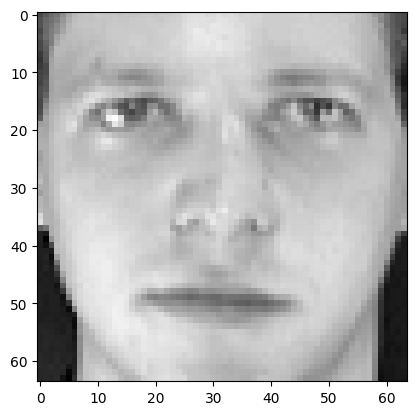

In [46]:
import matplotlib.pyplot as plt     
plt.imshow(X[0], cmap='gray')              ### pick up the first face sample 
plt.show()

### แบ่งชุดข้อมูลนี้ออกเป็น 80% สำหรับข้อมูลฝึกฝน และ 20% สำหรับข้อมูลทดสอบ 

In [47]:
X = X.reshape(400, 64*64)                                  ## reshape image's matrix to feature matrix

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape)

(320, 4096) (80, 4096)


สร้างโมเดล ชื่อ ‘model1’ โดยวิธี centroid พร้อมแสดงความแม่นยำบนชุดข้อมูลทดสอบ 

In [48]:
from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(X_train, Y_train)

,metric,'euclidean'
,shrink_threshold,None
,priors,'uniform'


บันทึกโมเดลในข้อ 14 ในรูปของไฟล์ pickle ตั้งชื่อ face_centroid.pkl 

In [49]:
import pickle

filename = 'face_centroid.pkl'
pickle.dump(model, open(filename, 'wb'))

สร้างโมเดล ชื่อ ‘model2’ โดยวิธี 1-NN พร้อมเปรียบเทียบผลลัพธ์บนชุดข้อมูลทดสอบกับโมเดล centroid  โดย

In [51]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

# โหลดโมเดล centroid จาก pickle
model1 = pickle.load(open('face_centroid.pkl', 'rb'))

# สร้างโมเดล 1-NN
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train, Y_train)

# ประเมินผลบนชุดทดสอบ
acc_centroid = model1.score(X_test, Y_test)
acc_model2 = model2.score(X_test, Y_test)

print("Centroid model accuracy: {:.2f}%".format(acc_centroid * 100))
print("1-NN model accuracy (model2): {:.2f}%".format(acc_model2 * 100))

Centroid model accuracy: 86.25%
1-NN model accuracy (model2): 95.00%
